In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("amazon_prime_titles.csv")
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [3]:
data.drop(["show_id"],axis=1,inplace=True)
data.drop(["description"],axis=1,inplace=True)
data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama"
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International"
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense"
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          9668 non-null   object
 1   title         9668 non-null   object
 2   director      7585 non-null   object
 3   cast          8435 non-null   object
 4   country       672 non-null    object
 5   date_added    155 non-null    object
 6   release_year  9668 non-null   int64 
 7   rating        9331 non-null   object
 8   duration      9668 non-null   object
 9   listed_in     9668 non-null   object
dtypes: int64(1), object(9)
memory usage: 755.4+ KB


In [5]:
data["director"].fillna("Unavailable",inplace=True)
data["cast"].fillna("Unavailable",inplace=True)
data["country"].fillna("Unavailable",inplace=True)

In [6]:
data["date_added"]=data["date_added"].ffill()
data["rating"]=data["rating"].fillna(data["rating"].mode()[0])

In [7]:
data.isna().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [8]:
data["date_added"]= pd.to_datetime(data["date_added"])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          9668 non-null   object        
 1   title         9668 non-null   object        
 2   director      9668 non-null   object        
 3   cast          9668 non-null   object        
 4   country       9668 non-null   object        
 5   date_added    9668 non-null   datetime64[ns]
 6   release_year  9668 non-null   int64         
 7   rating        9668 non-null   object        
 8   duration      9668 non-null   object        
 9   listed_in     9668 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 755.4+ KB


In [10]:
filtered_directors=data[data["director"]!="Unavailable"]
top_directors=filtered_directors["director"].value_counts().head(10)
top_directors

director
Mark Knight              113
Cannis Holder             61
Moonbug Entertainment     37
Jay Chapman               34
Arthur van Merwijk        30
Manny Rodriguez           22
John English              20
1                         16
Brian Volk-Weiss          15
Baeble Music              14
Name: count, dtype: int64

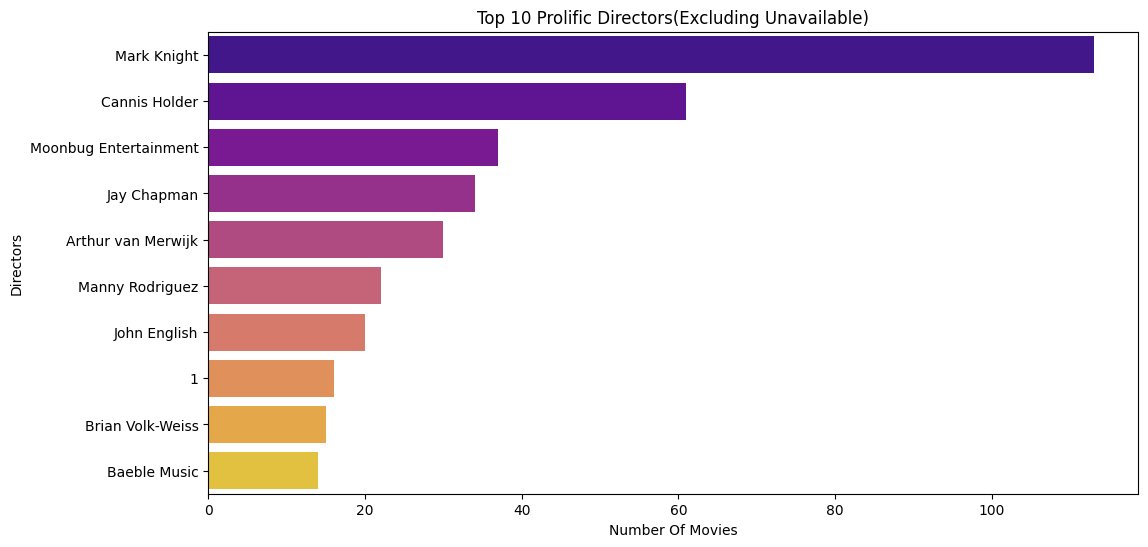

In [11]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_directors.values,y=top_directors.index,palette="plasma")
plt.title("Top 10 Prolific Directors(Excluding Unavailable)")
plt.xlabel("Number Of Movies")
plt.ylabel("Directors")
plt.show()


In [12]:
filtered_actors=data[data["cast"]!="Unavailable"]
top_actors=filtered_actors["cast"].value_counts().head(10)
top_actors

cast
Maggie Binkley                      56
1                                   34
Anne-Marie Newland                  24
Cassandra Peterson                  21
Grace Tamayo, Erin Webbs            17
Gene Autry, Champion, Gail Davis    12
Stevin John                         11
LB, Aaron Michael                    9
Gallagher                            9
Eddie Izzard                         9
Name: count, dtype: int64

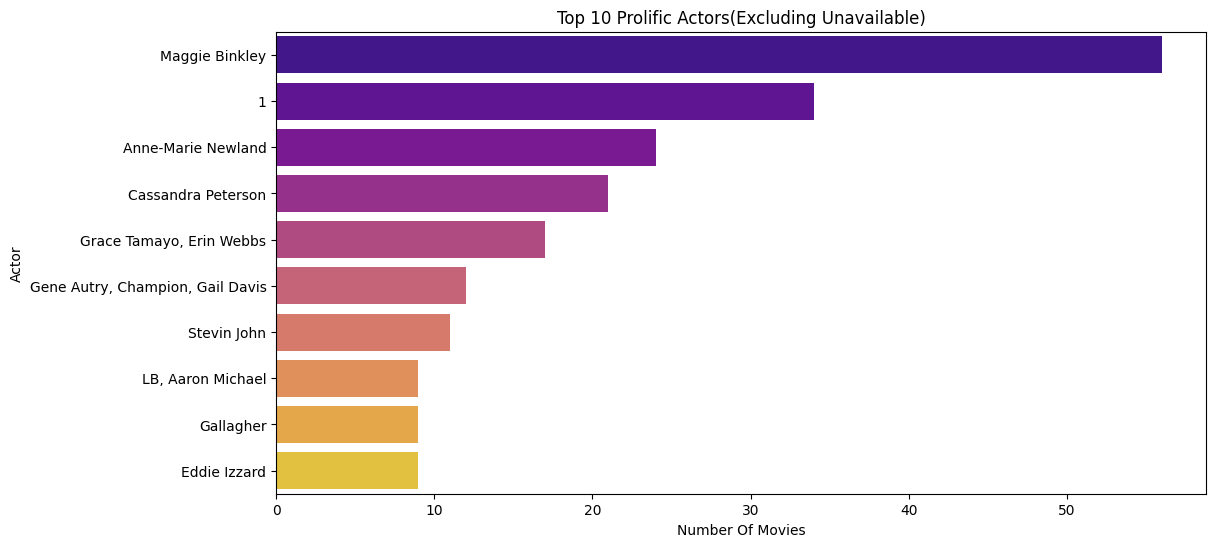

In [13]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_actors.values,y=top_actors.index,palette="plasma")
plt.title("Top 10 Prolific Actors(Excluding Unavailable)")
plt.xlabel("Number Of Movies")
plt.ylabel("Actor")
plt.show()


In [14]:
data["type"].value_counts()

type
Movie      7814
TV Show    1854
Name: count, dtype: int64

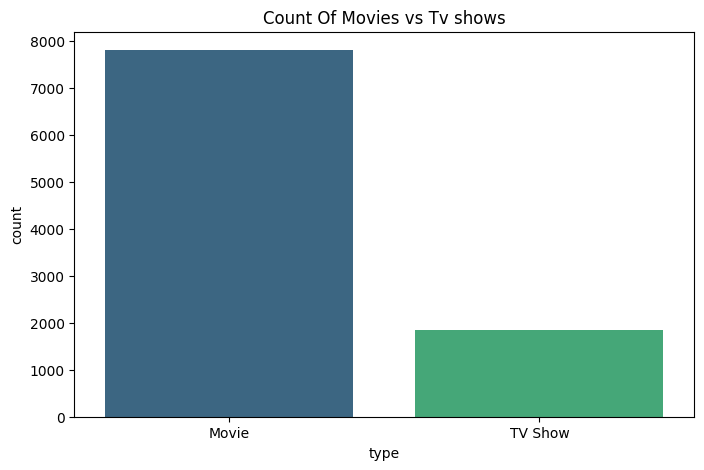

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(data=data,x="type",palette="viridis")
plt.title("Count Of Movies vs Tv shows")
plt.show()

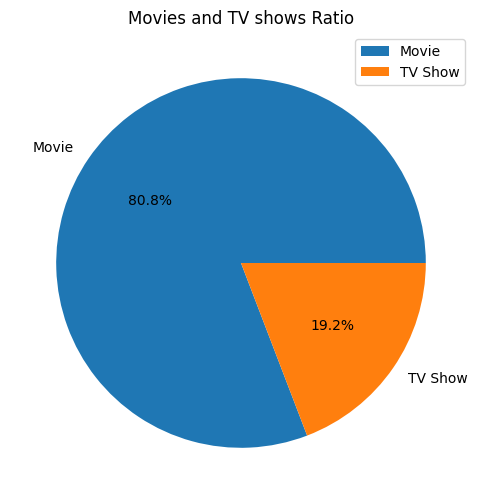

In [16]:
df_pie=data["type"].copy().value_counts()
plt.figure(figsize=(6,6))
plt.pie(x=df_pie.values,labels=df_pie.index,autopct="%1.1f%%")
plt.title("Movies and TV shows Ratio")
plt.legend()
plt.show()

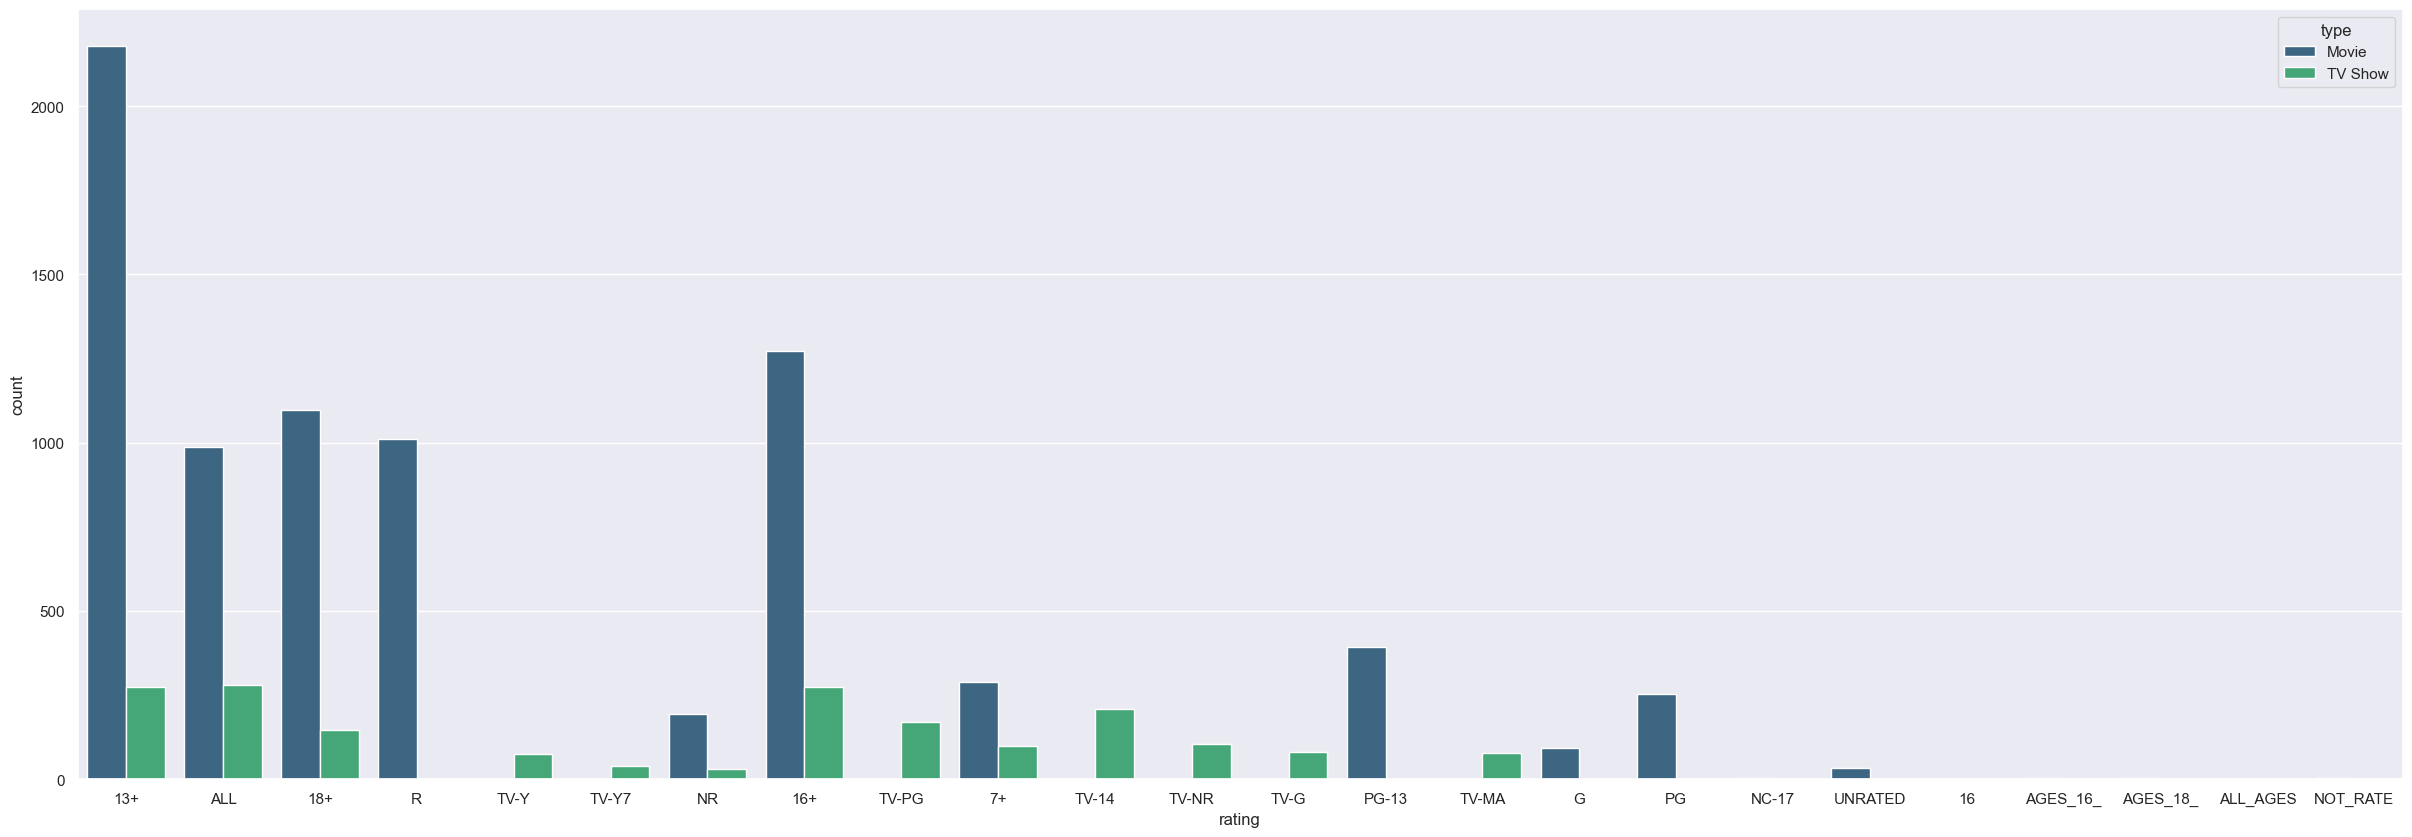

In [34]:
plt.figure(figsize=(30,10))
sns.countplot(x="rating",data=data,hue="type",palette="viridis")
plt.show()

In [36]:
filtered_country=data[data["country"]!="Unavailable"]
country_counts=filtered_country['country'].value_counts()
country_counts

country
United States                                               253
India                                                       229
United Kingdom                                               28
Canada                                                       16
United Kingdom, United States                                12
                                                           ... 
United States, Mexico                                         1
United States, Germany, Japan, United Kingdom, Hong Kong      1
Italy, Canada                                                 1
France, Belgium                                               1
Italy, Spain                                                  1
Name: count, Length: 86, dtype: int64

In [37]:
top_countries=country_counts.nlargest(3).index
top_countries

Index(['United States', 'India', 'United Kingdom'], dtype='object', name='country')

In [39]:
df_top_countries=filtered_country[filtered_country["country"].isin(top_countries)]
df_top_countries

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,Genres
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,2018,13+,110 min,"Drama, International","[Drama, International]"
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2021-03-30,2017,13+,74 min,"Action, Drama, Suspense","[Action, Drama, Suspense]"
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,2021-03-30,2014,13+,69 min,Documentary,[Documentary]
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,2021-03-30,1989,13+,45 min,"Drama, Fantasy","[Drama, Fantasy]"
5,Movie,Living With Dinosaurs,Paul Weiland,"Gregory Chisholm, Juliet Stevenson, Brian Hens...",United Kingdom,2021-03-30,1989,13+,52 min,"Fantasy, Kids","[Fantasy, Kids]"
...,...,...,...,...,...,...,...,...,...,...,...
9604,Movie,Bride Wars,Gary Winick,"Kate Hudson, Anne Hathaway, Kristen Johnston, ...",United States,2021-10-08,2009,PG,89 min,Comedy,[Comedy]
9614,Movie,What Happens in Vegas,Tom Vaughan,"Cameron Diaz, Ashton Kutcher, Rob Corddry, ...",United States,2021-10-08,2008,PG-13,99 min,Comedy,[Comedy]
9641,Movie,Marley & Me,David Frankel,"Owen Wilson, Jennifer Aniston",United States,2021-10-10,2008,PG,116 min,"Comedy, Drama, Kids","[Comedy, Drama, Kids]"
9643,Movie,Love & Other Drugs,Edward Zwick,"K K, Jake Gyllenhaal, Anne Hathaway, Oliver Pl...",United States,2021-10-10,2010,R,112 min,"Comedy, Drama","[Comedy, Drama]"


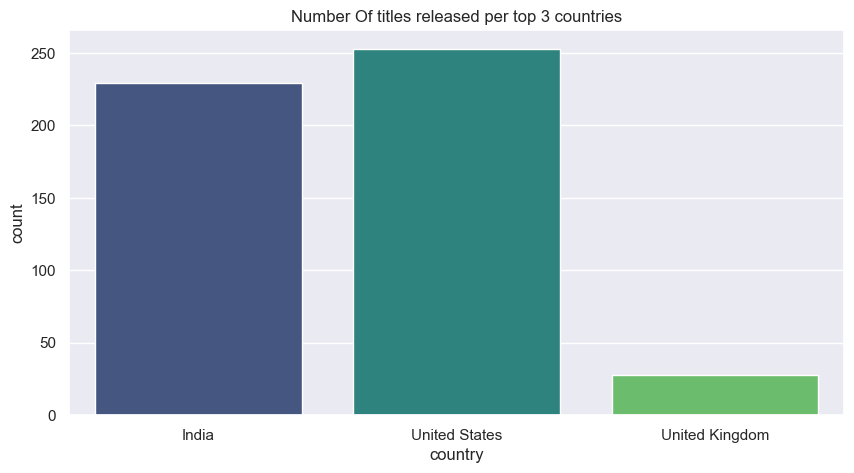

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_top_countries,x="country",palette="viridis")
plt.title("Number Of titles released per top 3 countries")
plt.show()

<Axes: xlabel='country', ylabel='count'>

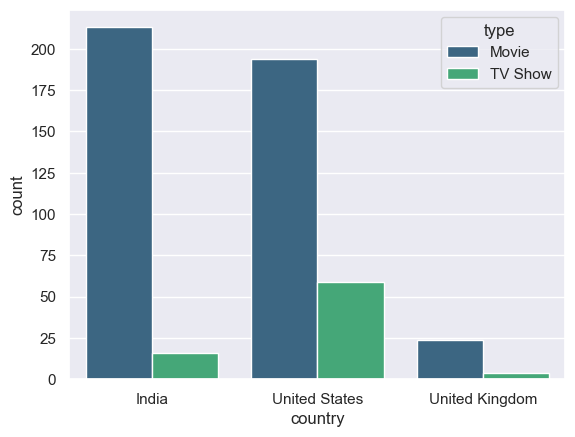

In [42]:
sns.countplot(data=df_top_countries,x="country",hue="type",palette="viridis")

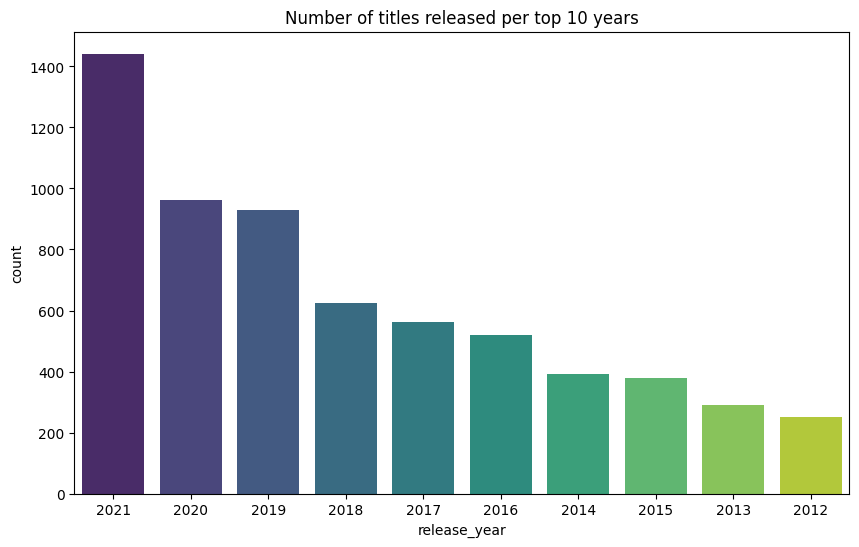

In [17]:
year_counts=data["release_year"].value_counts()
top_years=year_counts.nlargest(10).index
df_top_years=data[data["release_year"].isin(top_years)]
plt.figure(figsize=(10,6))
sns.countplot(data=df_top_years,x="release_year",palette="viridis",order=top_years)
plt.title("Number of titles released per top 10 years")
plt.show()

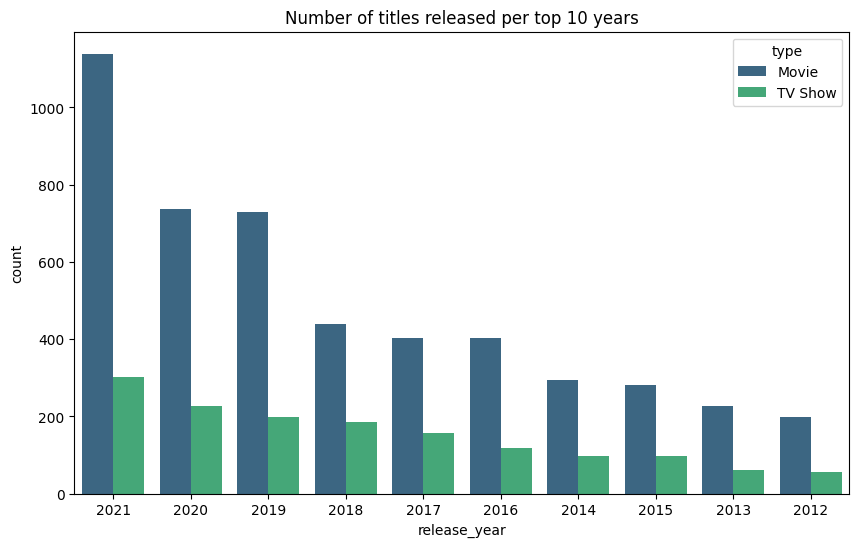

In [18]:
year_counts=data["release_year"].value_counts()
top_years=year_counts.nlargest(10).index
df_top_years=data[data["release_year"].isin(top_years)]
plt.figure(figsize=(10,6))
sns.countplot(data=df_top_years,x="release_year",hue="type",palette="viridis",order=top_years)
plt.title("Number of titles released per top 10 years")
plt.show()

In [19]:
data["Genres"]=data["listed_in"].apply(lambda x:x.split(', '))
data["Genres"]

0                 [Comedy, Drama]
1          [Drama, International]
2       [Action, Drama, Suspense]
3                   [Documentary]
4                [Drama, Fantasy]
                  ...            
9663                     [Comedy]
9664                   [TV Shows]
9665                     [Action]
9666              [Drama, Sports]
9667    [Action, Drama, Suspense]
Name: Genres, Length: 9668, dtype: object

In [20]:
genres_exploded=data.explode("Genres")

In [21]:
genres_exploded

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,Genres
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021-03-30,2014,13+,113 min,"Comedy, Drama",Comedy
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021-03-30,2014,13+,113 min,"Comedy, Drama",Drama
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,2018,13+,110 min,"Drama, International",Drama
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,2018,13+,110 min,"Drama, International",International
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2021-03-30,2017,13+,74 min,"Action, Drama, Suspense",Action
...,...,...,...,...,...,...,...,...,...,...,...
9666,TV Show,Maradona: Blessed Dream,Unavailable,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",Unavailable,2021-10-10,2021,TV-MA,1 Season,"Drama, Sports",Drama
9666,TV Show,Maradona: Blessed Dream,Unavailable,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",Unavailable,2021-10-10,2021,TV-MA,1 Season,"Drama, Sports",Sports
9667,Movie,Harry Brown,Daniel Barber,"Michael Caine, Emily Mortimer, Joseph Gilgun, ...",Unavailable,2021-10-10,2010,R,103 min,"Action, Drama, Suspense",Action
9667,Movie,Harry Brown,Daniel Barber,"Michael Caine, Emily Mortimer, Joseph Gilgun, ...",Unavailable,2021-10-10,2010,R,103 min,"Action, Drama, Suspense",Drama


Text(0.5, 1.0, 'Distribution of Genres')

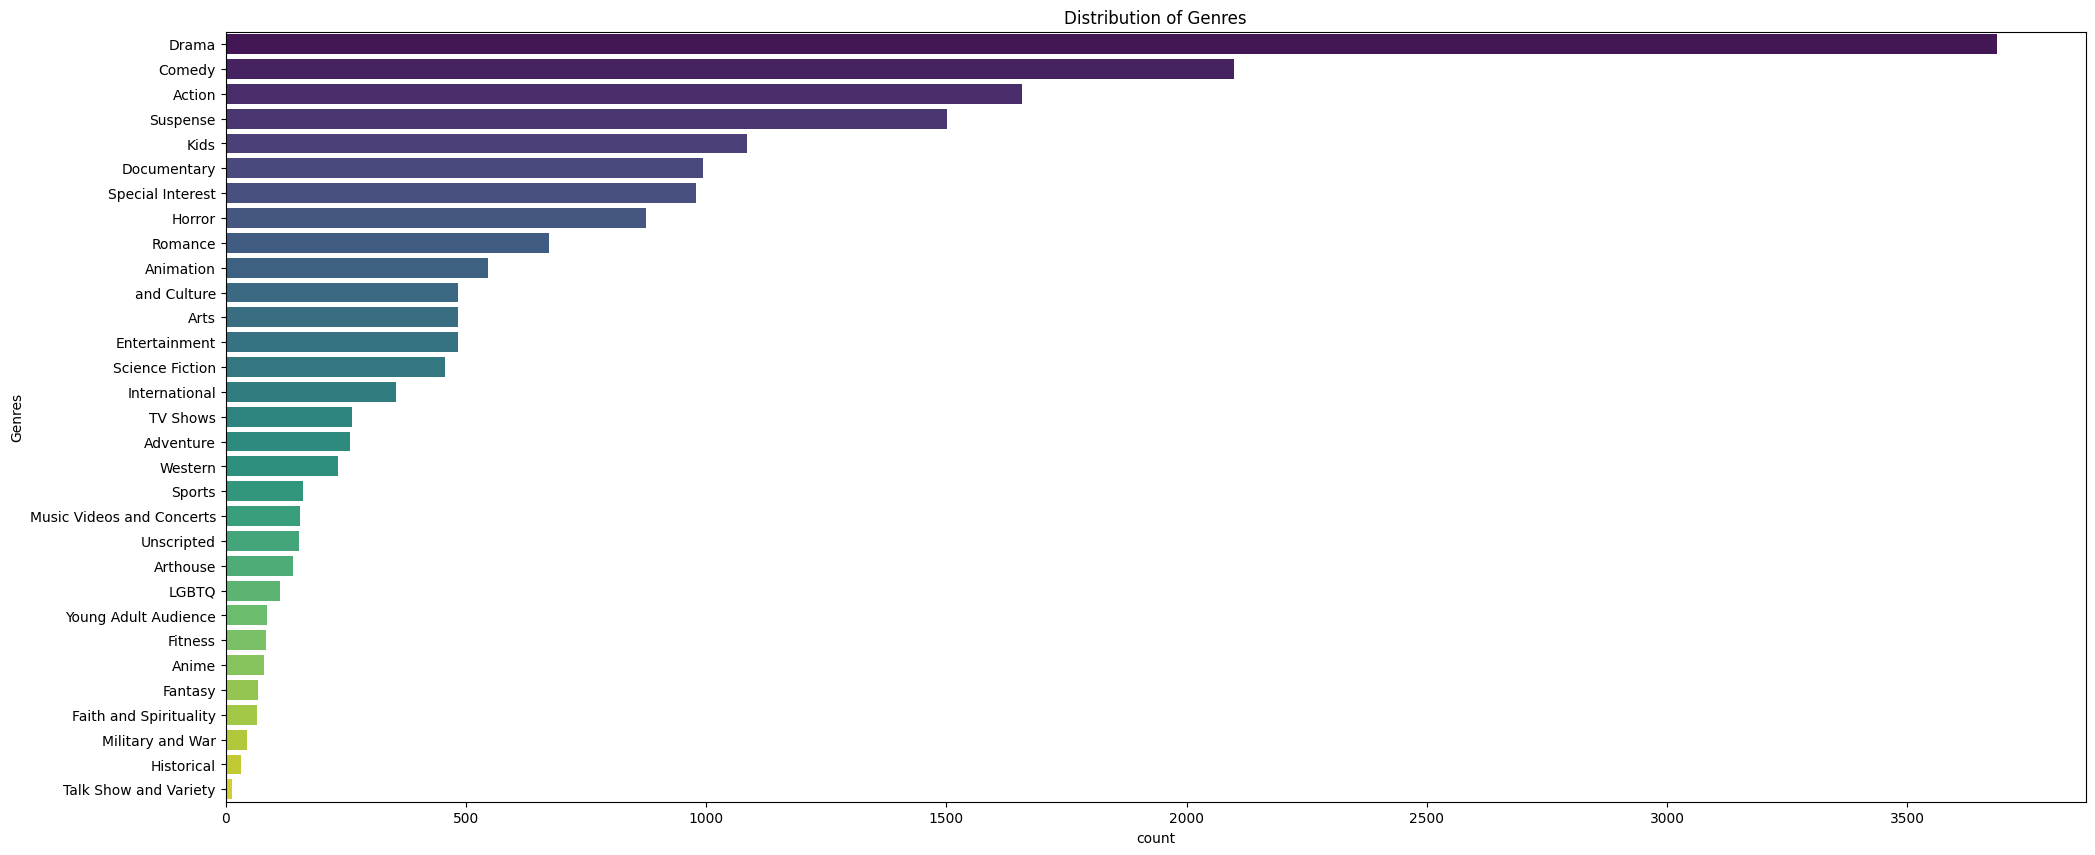

In [22]:
plt.figure(figsize=(24,10))
sns.countplot(data=genres_exploded,y="Genres",order=genres_exploded["Genres"].value_counts().index,palette="viridis")
plt.title("Distribution of Genres")

In [23]:
df_movies=data[data["type"]=="Movie"].copy()
df_tv_shows=data[data["type"]=="TV Show"].copy()


In [24]:
df_movies["duration_num"]=df_movies["duration"].str.extract("(\d+)",expand=False).astype(float)
df_tv_shows["duration_num"]=df_tv_shows["duration"].str.extract("(\d+)",expand=False).astype(float)

In [25]:
df_movies

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,Genres,duration_num
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021-03-30,2014,13+,113 min,"Comedy, Drama","[Comedy, Drama]",113.0
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,2018,13+,110 min,"Drama, International","[Drama, International]",110.0
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2021-03-30,2017,13+,74 min,"Action, Drama, Suspense","[Action, Drama, Suspense]",74.0
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,2021-03-30,2014,13+,69 min,Documentary,[Documentary],69.0
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,2021-03-30,1989,13+,45 min,"Drama, Fantasy","[Drama, Fantasy]",45.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9660,Movie,The Man in the Hat,"John-Paul Davidson, Stephen Warbeck","Ciaran Hinds, Stephen Dillane, Maïwenn",Unavailable,2021-10-10,2021,13+,96 min,Comedy,[Comedy],96.0
9662,Movie,River,Emily Skye,"Mary Cameron Rogers, Alexandra Rose, Rob Marsh...",Unavailable,2021-10-10,2021,16+,93 min,"Drama, Science Fiction, Suspense","[Drama, Science Fiction, Suspense]",93.0
9663,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",Unavailable,2021-10-10,1940,7+,60 min,Comedy,[Comedy],60.0
9665,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",Unavailable,2021-10-10,2008,R,90 min,Action,[Action],90.0


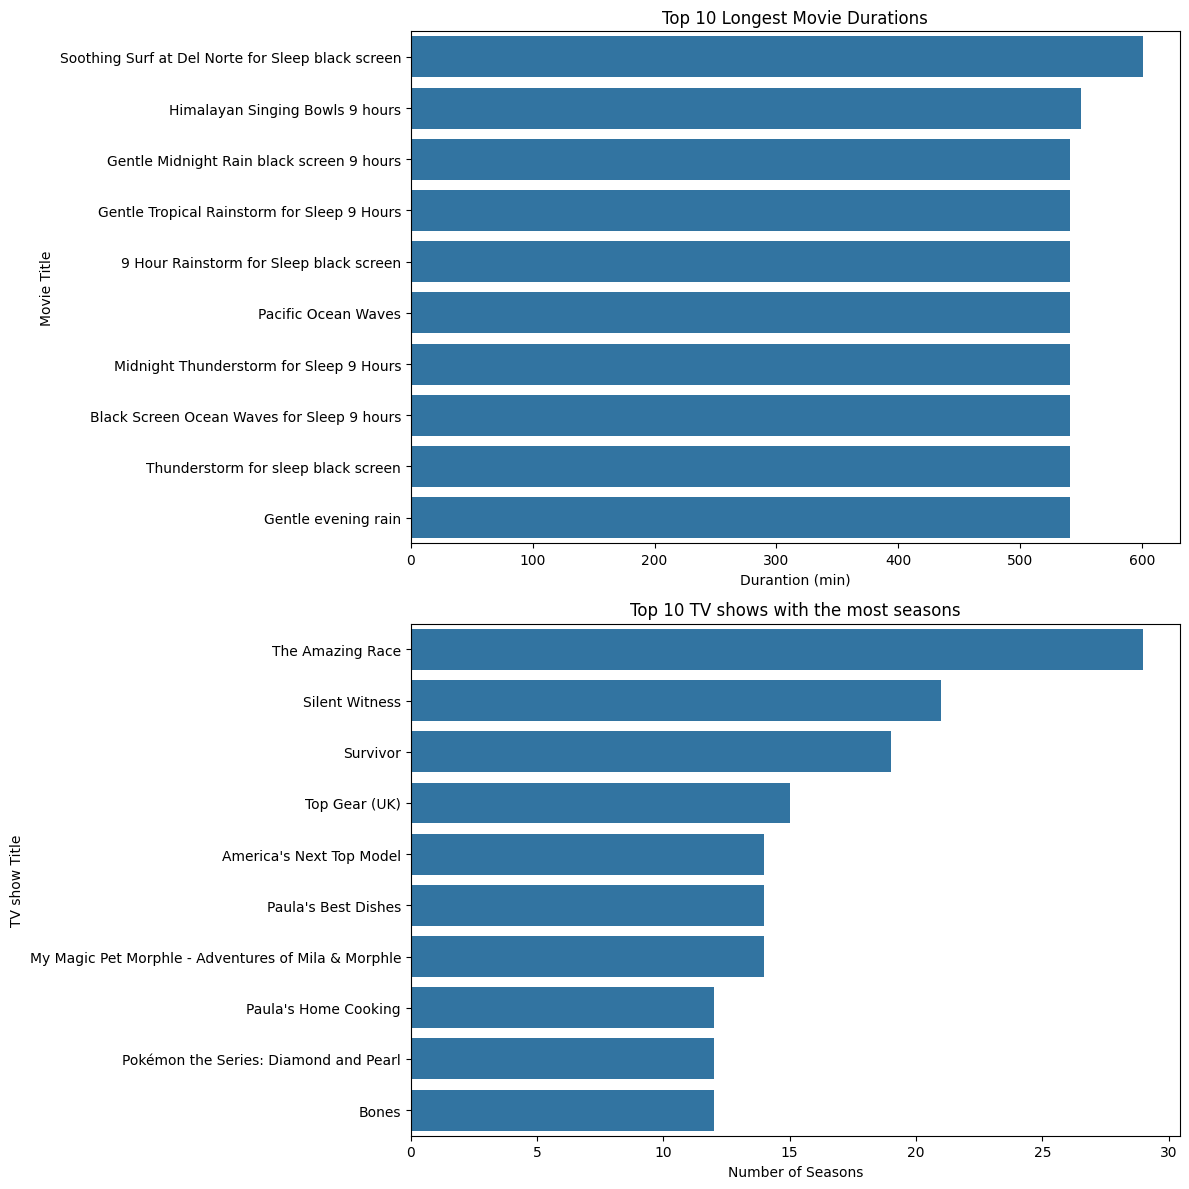

In [26]:
plt.figure(figsize=(12,12))

plt.subplot(2,1,1)
sns.barplot(data=df_movies.sort_values(by="duration_num",ascending=False).head(10),y="title",x="duration_num",orient="horizontal")
plt.title("Top 10 Longest Movie Durations")
plt.xlabel("Durantion (min)")
plt.ylabel("Movie Title")

plt.subplot(2,1,2)
sns.barplot(data=df_tv_shows.sort_values(by="duration_num",ascending=False).head(10),y="title",x="duration_num",orient="horizontal")
plt.title("Top 10 TV shows with the most seasons")
plt.xlabel("Number of Seasons")
plt.ylabel("TV show Title")

plt.tight_layout()
plt.show()



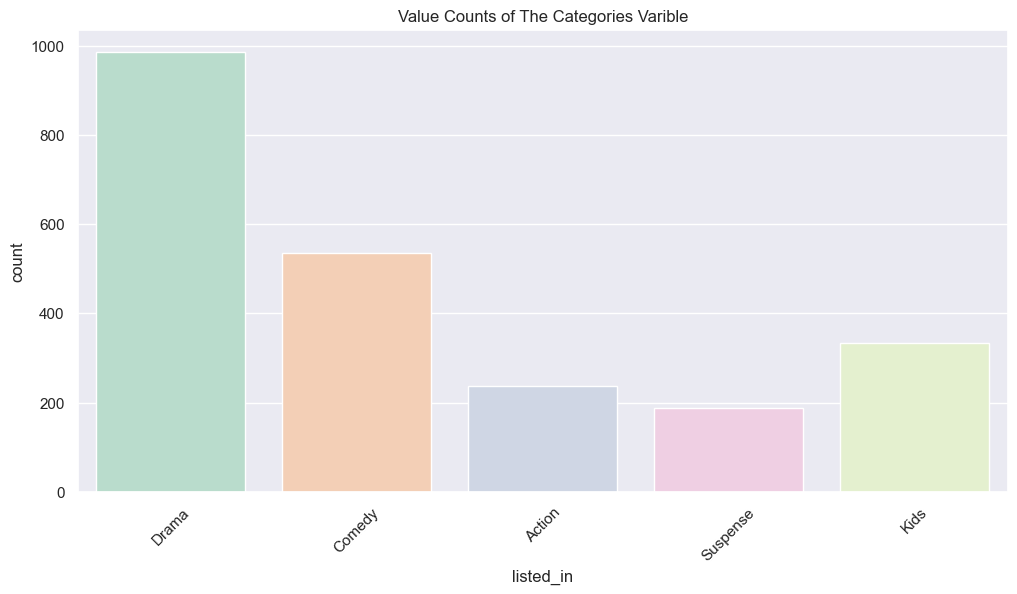

In [32]:
data["Genres"] = data["listed_in"].apply(lambda x:x.split(', '))
genres_exploded = data.explode("Genres")

plt.figure(figsize=(12,6))
plt.title("Value Counts of The Categories Varible")
sns.set(style="darkgrid")
sns.countplot(x="listed_in",data=genres_exploded,palette="Pastel2",order=genres_exploded["Genres"].value_counts().iloc[:5].index)
plt.xticks(rotation=45)
plt.show()